University of Zagreb, Faculty of Electrical Engineering and Computing

# Introduction to Data Science Course Project
## Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms

#### Fani Sentinella-Jerbić, Matej Čubek, Leon Novački, Fran Hrabar, 2021

---

This project's aim is to replicate and creatively expand a data science themed scientific article using a Jupyter notebook. We replicated the following article:

S. Ara, A. Das and A. Dey, _Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms_, 2021 International Conference on Artificial Intelligence (ICAI), 2021, pp. 97-101, doi: 10.1109/ICAI52203.2021.9445249.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections

plt.style.use('seaborn')

### About the article


#### Research type classification:
- according to purpose: **applied** - uses known methods on new problems, doesn't answer any general questions in the field of artificial science nor does it introduce any new methods
- according to information origin: **secondary** - uses dataset provided by another institution
- according to time: **cross-sectional study** - made from an existing dataset during the International Conference on Artificial Intelligence in Islamabad
- according to method of gathering: **documentary** - uses existing data for the analysis, doesn't collect any new data
- according to data type: **quantitative** - all features have numerical values which are then used to compute the predictions
- according to degree of manipulation: **observational** - the data was collected from real patients already having the breast cancer
- according to depth of conclusion: **correlational** - tries to determine a model which predicts if a person has benign or malignant breast cancer based on the collected features
- according to type of conclusion: **deductive** - some things can be predicted by ML algorithms and that is what the authors of this article tried to do for breast cancer classification


#### Method of information retrieval:

Authors used an existing dataset provided by the University of Wisconsin Hospitals and donated by Nick Street in November 1995.


#### Research ethics:

The article was made and published as a part of the International Conference on Artificial Intelligence in Islamabad which is under sponsorship of IEEE. This leads me to believe it is published legally and with a certain level of academic dignity. The research did not include dealing with patients since they used a pre-existing dataset so I believe they caused minimum risk of harm to society. 

However, the article contains some logical issues in interpreting graphical data (described further in this notebook) so one could argue that the academic dignity of the article is questionable. This is not unusual for an article written at a conference since the time spent on the article is limited. Also, the article could have given more academic credit to the authors of the dataset which wanted certain information to be provided when the dataset is used in research (can be seen at the end of this notebook). 

### Descriptive analysis
The dataset used is a special dataset called "Wisconsin Diagnostic Breast Cancer (WDBC)". It consists of 357 benign and 212 malignant cancer samples, as seen in the barchart below. 

In [3]:
from sklearn import datasets

data = datasets.load_breast_cancer()

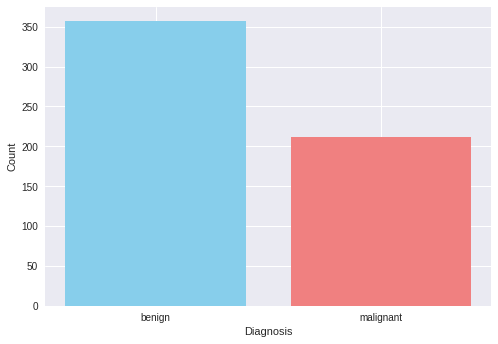

In [4]:
cnt = np.bincount(data.target)
plt.bar(data.target_names[::-1], cnt[::-1], color=['skyblue', 'lightcoral'])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

It contains calculated measures such as **mean**, **standard error** and **the worst (largest) value** of 30 different parameters determined by microscopic analysis on the breast tissue. The tissue is collected from a patient through *Fine Needle Aspiration* biopsy procedure. 

In [5]:
# original samples
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Below we can see the counterplot of the mean radius. 

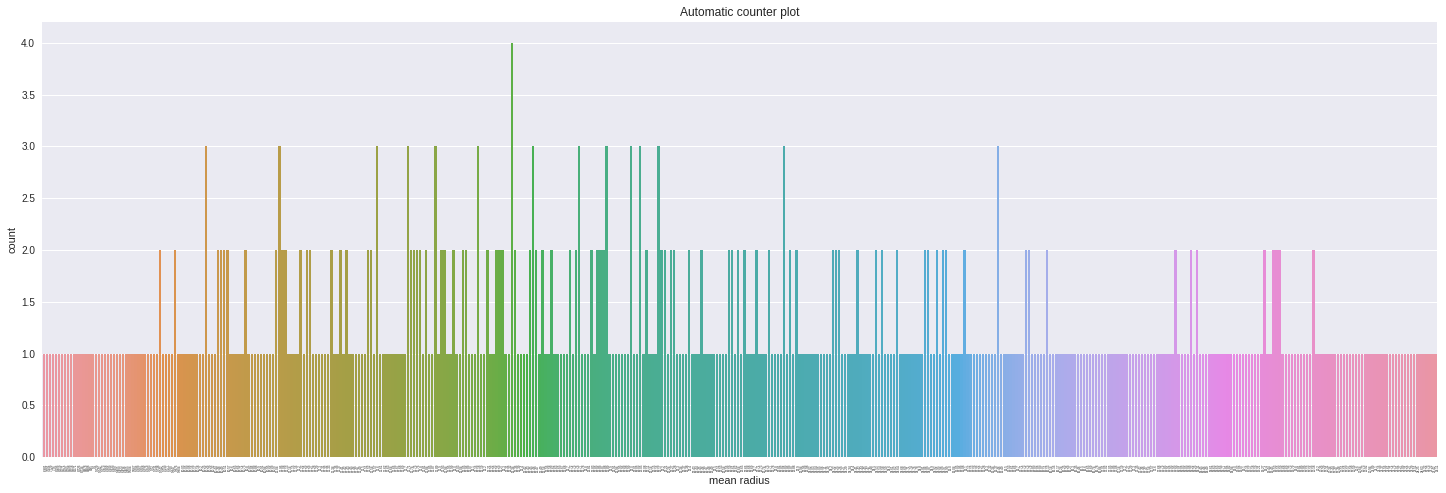

In [6]:
plt.figure(figsize=(25, 8))
ax = sns.countplot(x=X['mean radius'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left", fontsize=3)
plt.title('Automatic counter plot')
plt.show()

As the x-axis values are not recognizable, we have plotted another counterplot:

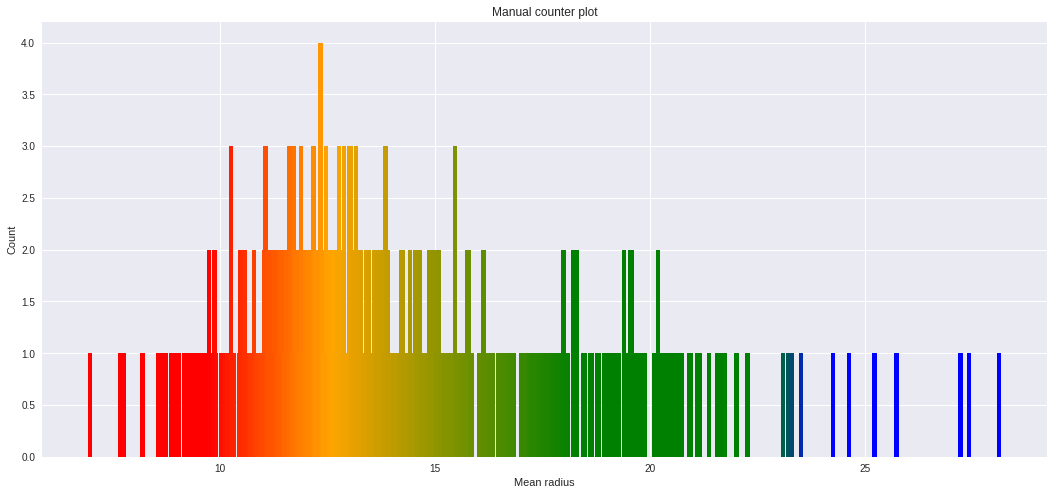

In [7]:
import matplotlib.colors as mcolors

w = collections.Counter(X['mean radius'])

clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"),
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
plt.figure(figsize=(18, 8))
xp = np.array(list(w.keys())).astype(float)
yp = np.array(list(w.values())).astype(float)
plt.bar(xp, yp, color=rvb(20 * xp / len(xp) - 0.3), width=0.1)
plt.title('Manual counter plot')
plt.xlabel('Mean radius')
plt.ylabel('Count')
plt.show()

The authors of the scientific paper have determined the following from the counter graph: *it can be observed that suspected patients not bearing cancer have a mean radius of around 1, whereas suspected patients bearing cancer have a 
mean radius of more than 1*, however I believe  the authors have made a mistake. The graph doesn't show the radius being around 1 for any of the patients. In fact, the smallest radius mean in the dataset is 6.981 and the mean of all radius means is 14.127292 (calculated in the previous section), which is far from 1. 

The proof of this can also be seen in the histogram below.

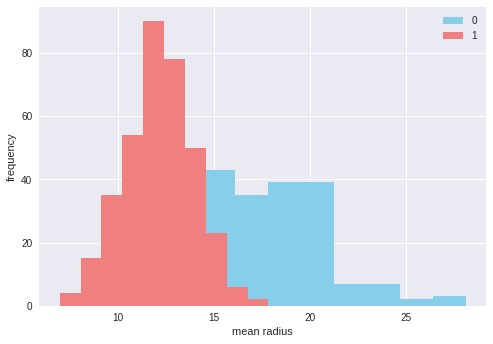

In [8]:
D = pd.DataFrame(X.copy())
D.insert(0, 'diagnosis', data.target)

D['mean radius'][D['diagnosis'] == 0].hist(color='skyblue', label='0')
D['mean radius'][D['diagnosis'] == 1].hist(color='lightcoral', label='1')
plt.xlabel('mean radius')
plt.ylabel('frequency')
plt.legend()
plt.show()

### Train-test split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

D_train = pd.DataFrame(X_train.copy())
D_train.insert(0, 'diagnosis', y_train)

### Feature selection
For feature selecton we will start with comparing all features present in the dataset. Using a heatmap correlations between all the available features is graphicaly shown. The correlation value is in range [0,1] where 1 presents perfect correlation and 0 presents no correlation whatsoever. Correlation value is calculated using the Phi coefficient also known as the Matthews correlation coefficient.

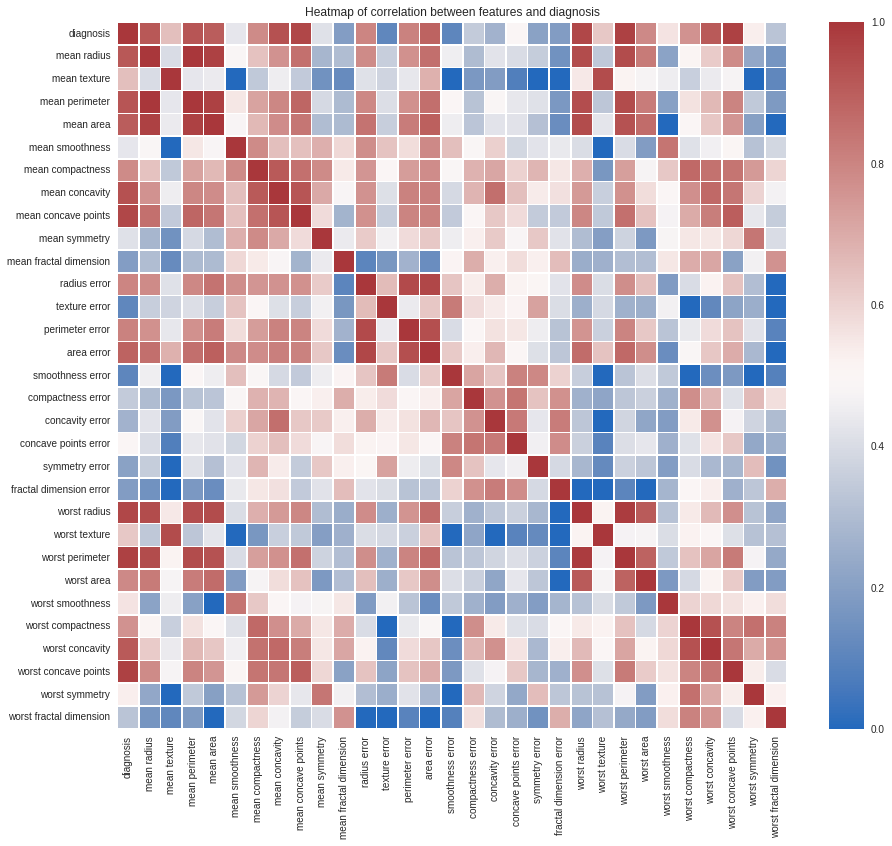

In [34]:
!pip install phik
import phik

D_train = pd.DataFrame(X_train.copy())
D_train.insert(0, 'diagnosis', y_train)

#cor_matrix = D_train.corr()
cor_matrix_with_target = D_train.phik_matrix(interval_cols=D_train.columns)
cor_matrix_without_target = X_train.phik_matrix(interval_cols=X_train.columns)

plt.figure(figsize=(15, 13))
sns.heatmap(cor_matrix_with_target, cmap="vlag", linewidths=.5)  #, mask=np.triu(D_train_mean.corr()))
plt.title("Heatmap of correlation between features and diagnosis")
plt.show()

From the heatmap we can note that there are many features that are higly correlated each other. Those features can negativly impact out ML models, so we need to remove them from the dataset before we start training our models. We will do so using the correlation matrix and searching for pairs with a correlation of grater then 0.9. From each of those pairs one feature can be removed. Features marked as redundant by correlation with others are printed below.

In [35]:
upper_tri = cor_matrix_without_target.abs().where(
    np.triu(np.ones(cor_matrix_without_target.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

print(list(to_drop))

['mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']


In [36]:
X_train = X_train.drop(list(to_drop), axis=1)
X_test = X_test.drop(list(to_drop), axis=1)
D_train = D_train.drop(list(to_drop), axis=1)

X_train.shape

(426, 19)

Next we will compare the correlation of the remaining features with the target feature. For this comparison the pi coeffitient is used once again. From the barplot we can note what the most interesting features for us to train our models could be.


<Figure size 720x360 with 0 Axes>

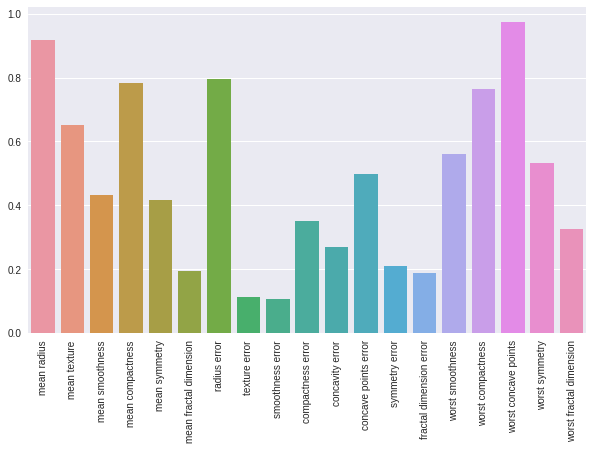

In [37]:
plt.figure(figsize=(10, 5))

corr_with_target = D_train.phik_matrix(interval_cols=X_train.columns)['diagnosis'].drop(labels=['diagnosis'])

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.show()

Now we will use a Feature selection method to select a subset of the remaining features in the dataset. We only to select some features that can impact our models the positivly and drop the rest as that will yield the best results.

The method for Feature Selection used is SequentialFeatureSelector. It is a greedy algorithm that selects the best subset of features by going forward based on a cross validation score of an estimator. It starts with zero features and then finds a feature that maximizes the cross-validated score on the selected feature. Then the process is repeated by adding another feature until the point that the desired number is reached. The logistic regression algorithm is used as an estimator for this feature selection method.

In [39]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

X_best = SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500), n_features_to_select=7, cv=10,
                                   direction='forward', n_jobs=4).fit(X_train, y_train)
mask = X_best.get_support()
best_features = []
for curr_bool, feature in zip(mask, X_train.columns):
    if curr_bool:
        best_features.append(feature)

print(f"Best features are: {best_features}")

Best features are: ['mean radius', 'mean texture', 'mean fractal dimension', 'radius error', 'smoothness error', 'compactness error', 'worst compactness']


In [40]:
X_train = X_train[X_train.columns[X_best.get_support(indices=True)]]
X_test = X_test[X_test.columns[X_best.get_support(indices=True)]]

X_train.shape

(426, 7)

--- 

### Training and testing

Some algorithms perform better when the data is scaled so that is what I did here. Article authors mention using scaling as well.

In [41]:
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
X_train_s = sclr.fit_transform(X_train)
X_test_s = sclr.fit_transform(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(
    columns=['Algorithms', 'Training Accuracy', 'Testing Accuracy', 'Testing Recall', 'Testing F1 Score',
             'Testing AUC'])


def test_model(model, model_label, X_train, y_train, X_test, y_test, mod=None, print_bool=True):
    if mod is not None:
        predicted_train = model.predict(mod.fit_transform(X_train))
        predicted_test = model.predict(mod.fit_transform(X_test))
    else:
        predicted_train = model.predict(X_train)
        predicted_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, predicted_train)
    test_accuracy = accuracy_score(y_test, predicted_test)
    test_recall = recall_score(y_test, predicted_test)
    test_f1_score = f1_score(y_test, predicted_test)
    test_auc = roc_auc_score(y_test, predicted_test)

    if print_bool:
        print(f'Algorithm: {model_label}')
        print(f'Training accuracy: {train_accuracy}\nTesting accuracy: {test_accuracy}')
        print(f'Test recall: {test_recall}\nTesting F1 Score: {test_f1_score}\nTesting AUC: {test_auc}\n')

    return {'Algorithms': model_label, 'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Testing Recall': test_recall,
            'Testing F1 Score': test_f1_score,
            'Testing AUC': test_auc}


def draw_confusion_matrix(model, graph_label, X_dataset, y_dataset, mod=None):
    if mod is None:
        y_generated = model.predict(X_dataset)
    else:
        y_generated = model.predict(mod.fit_transform(X_dataset))

    cf_matrix = confusion_matrix(y_dataset, y_generated)

    cbar_kws = {
        "ticks": np.array([15, 30, 45, 60, 75]),
    }

    sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=5, cbar_kws=cbar_kws)
    plt.title(graph_label)


def grid_search(model, hyperparams, X_dataset, y_dataset, mod=None, metric='f1', print_bool=True):
    search = GridSearchCV(model, hyperparams, scoring=metric, n_jobs=-1, verbose=0)

    if mod is not None:
        result = search.fit(mod.fit_transform(X_dataset), y_dataset)
    else:
        result = search.fit(X_dataset, y_dataset)

    if print_bool:
        print('Best hyperparameters: ' + str(result.best_params_))
    return result.best_estimator_

#### Logistic regression


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings


def grid_search_LogisticRegression(X_train, y_train, X_test, y_test, results, print_bool=True):
    hyperparams = {
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
        'penalty': ['none', 'l1', 'l2', 'elasticnet'],
        'C': [0.1, 1, 10, 100],
    }

    with warnings.catch_warnings(record=True):
        clf_lr = grid_search(LogisticRegression(), hyperparams, X_train, y_train, sclr, print_bool=print_bool)

    results = results.append(
        test_model(clf_lr, 'Logistic regression', X_train, y_train, X_test, y_test, sclr, print_bool=print_bool),
        ignore_index=True)

    return clf_lr, results


clf_lr, results = grid_search_LogisticRegression(X_train, y_train, X_test, y_test, results)

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Training accuracy: 0.960093896713615
Testing accuracy: 0.972027972027972
Test recall: 1.0
Testing F1 Score: 0.9777777777777777
Testing AUC: 0.9636363636363636



#### Support Vector Machine

In [44]:
from sklearn.svm import SVC


def grid_search_SVM(X_train, y_train, X_test, y_test, results, print_bool=True):
    hyperparams = {
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': [1, 0.1, 0.01, 0.001],
        'C': [0.1, 1, 10, 100],
    }

    clf_svm = grid_search(SVC(), hyperparams, X_train, y_train, sclr, print_bool=print_bool)

    results = results.append(
        test_model(clf_svm, 'Support Vector Machine', X_train, y_train, X_test, y_test, sclr, print_bool=print_bool),
        ignore_index=True)

    return clf_svm, results


clf_svm, results = grid_search_SVM(X_train, y_train, X_test, y_test, results)

Best hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Training accuracy: 0.9647887323943662
Testing accuracy: 0.965034965034965
Test recall: 1.0
Testing F1 Score: 0.9723756906077349
Testing AUC: 0.9545454545454545



#### K-Nearest Neighbour

In [45]:
from sklearn.neighbors import KNeighborsClassifier


def grid_search_kNN(X_train, y_train, X_test, y_test, results, print_bool=True):
    hyperparams = {
        'n_neighbors': list(range(1, 15)),
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    }

    clf_knn = grid_search(KNeighborsClassifier(), hyperparams, X_train, y_train, sclr, print_bool=print_bool)

    results = results.append(test_model(clf_knn, 'KNN', X_train, y_train, X_test, y_test, sclr, print_bool=print_bool),
                             ignore_index=True)

    return clf_knn, results


clf_knn, results = grid_search_kNN(X_train, y_train, X_test, y_test, results)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Training accuracy: 1.0
Testing accuracy: 0.951048951048951
Test recall: 1.0
Testing F1 Score: 0.9617486338797814
Testing AUC: 0.9363636363636364



#### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier


#from sklearn import tree

def grid_search_DecisionTree(X_train, y_train, X_test, y_test, results, seed, print_bool=True):
    hyperparams = {
        'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 0],
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 6, 7, 8, 9, 10, None],
        'max_features': ['auto', 'sqrt', 'log2']
    }

    clf_dt = grid_search(DecisionTreeClassifier(random_state=seed), hyperparams, X_train, y_train,
                         print_bool=print_bool)

    #plt.figure(figsize = (10,7))
    #tree.plot_tree(clf_dt)

    results = results.append(
        test_model(clf_dt, 'Decision Tree', X_train, y_train, X_test, y_test, print_bool=print_bool), ignore_index=True)

    return clf_dt, results


clf_dt, results = grid_search_DecisionTree(X_train, y_train, X_test, y_test, results, seed=5)

Best hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}
Training accuracy: 0.9436619718309859
Testing accuracy: 0.951048951048951
Test recall: 0.9886363636363636
Testing F1 Score: 0.9613259668508287
Testing AUC: 0.9397727272727273



#### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB


def grid_search_NaiveBayes(X_train, y_train, X_test, y_test, results, print_bool=True):
    clf_nb = GaussianNB()
    clf_nb.fit(X_train, y_train)

    results = results.append(test_model(clf_nb, 'Naive Bayes', X_train, y_train, X_test, y_test, print_bool=print_bool),
                             ignore_index=True)

    return clf_nb, results


clf_nb, results = grid_search_NaiveBayes(X_train, y_train, X_test, y_test, results)

Training accuracy: 0.8896713615023474
Testing accuracy: 0.916083916083916
Test recall: 0.9090909090909091
Testing F1 Score: 0.9302325581395349
Testing AUC: 0.9181818181818182



#### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier


def grid_search_RandomForest(X_train, y_train, X_test, y_test, results, seed, print_bool=True):
    hyperparams = {
        'n_estimators': [50, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, None],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 4, 6]
    }

    clf_rf = grid_search(RandomForestClassifier(random_state=seed), hyperparams, X_train, y_train,
                         print_bool=print_bool)

    results = results.append(
        test_model(clf_rf, 'Random Forest', X_train, y_train, X_test, y_test, print_bool=print_bool), ignore_index=True)

    return clf_rf, results


clf_rf, results = grid_search_RandomForest(X_train, y_train, X_test, y_test, results, seed=5)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 50}
Training accuracy: 0.9882629107981221
Testing accuracy: 0.965034965034965
Test recall: 0.9886363636363636
Testing F1 Score: 0.9720670391061453
Testing AUC: 0.9579545454545455



#### XGBoost

In [49]:
import xgboost as xgb


def grid_search_XGBoost(X_train, y_train, X_test, y_test, results, print_bool=True):
    hyperparams = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 0.9],
        'colsample_bytree': [0.5, 0.7, 0.9],
        'n_estimators': [100, 200, 500],
        'eval_metric': ['logloss']
    }

    clf_xgb = grid_search(xgb.XGBClassifier(use_label_encoder=False), hyperparams, X_train, y_train,
                          print_bool=print_bool)

    results = results.append(test_model(clf_xgb, 'XGB', X_train, y_train, X_test, y_test, print_bool=print_bool),
                             ignore_index=True)

    return clf_xgb, results


clf_xgb, results = grid_search_XGBoost(X_train, y_train, X_test, y_test, results)

Best hyperparameters: {'colsample_bytree': 0.9, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
Training accuracy: 1.0
Testing accuracy: 0.958041958041958
Test recall: 0.9772727272727273
Testing F1 Score: 0.9662921348314608
Testing AUC: 0.9522727272727273



#### Multilayer perceptron

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adagrad
import numpy as np
import sklearn


def MLP(X_train, y_train, X_test, y_test, results, print_bool=True):
    model = tf.keras.Sequential()

    #input
    model.add(tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],)))
    model.add(Activation("relu"))

    #hidden
    model.add(tf.keras.layers.Dense(32))
    model.add(Activation("relu"))
    model.add(tf.keras.layers.Dense(32))
    model.add(Activation("relu"))

    #output
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    INIT_LR = 0.5
    NUM_EPOCHS = 1000
    BS = 128
    opt = Adagrad(learning_rate=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
    model.compile(loss="binary_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

    H = model.fit(
        x=X_train,
        y=y_train,
        batch_size=BS,
        #steps_per_epoch=X_train.shape[0] // BS,
        epochs=NUM_EPOCHS,
        verbose=0)

    predicted_train = np.multiply(model.predict(X_train) > 0.5, 1).flatten()
    predicted_test = np.multiply(model.predict(X_test) > 0.5, 1).flatten()

    train_accuracy = accuracy_score(y_train, predicted_train)
    test_accuracy = accuracy_score(y_test, predicted_test)
    test_recall = recall_score(y_test, predicted_test)
    test_f1_score = f1_score(y_test, predicted_test)
    test_auc = roc_auc_score(y_test, predicted_test)

    if print_bool:
        print('Algorithm: Multilayer perceptron')
        print(f'Training accuracy: {train_accuracy}\nTesting accuracy: {test_accuracy}')
        print(f'Test recall: {test_recall}\nTesting F1 Score: {test_f1_score}\nTesting AUC: {test_auc}\n')

    results = results.append({'Algorithms': "Multilayer Perceptron", 'Training Accuracy': train_accuracy,
                              'Testing Accuracy': test_accuracy,
                              'Testing Recall': test_recall,
                              'Testing F1 Score': test_f1_score,
                              'Testing AUC': test_auc}, ignore_index=True)

    return model, results


clf_mlp, results = MLP(X_train, y_train, X_test, y_test, results)

Training accuracy: 0.9553990610328639
Testing accuracy: 0.965034965034965
Test recall: 0.9886363636363636
Testing F1 Score: 0.9720670391061453
Testing AUC: 0.9579545454545455



#### ExtraTreesClassifier


In [51]:
from sklearn.ensemble import ExtraTreesClassifier


def grid_search_ExtraTrees(X_train, y_train, X_test, y_test, results, seed, print_bool=True):
    hyperparams = {
        'n_estimators': [50, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, None],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 4, 6]
    }

    clf_etc = grid_search(ExtraTreesClassifier(random_state=seed), hyperparams, X_train, y_train, print_bool=print_bool)

    #clf_etc = ExtraTreesClassifier(n_estimators=100, random_state=5)
    #clf_etc.fit(X_train, y_train)

    results = results.append(
        test_model(clf_etc, 'Extra Trees', X_train, y_train, X_test, y_test, print_bool=print_bool),
        ignore_index=True)

    return clf_etc, results


clf_etc, results = grid_search_ExtraTrees(X_train, y_train, X_test, y_test, results, seed=5)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 200}
Training accuracy: 1.0
Testing accuracy: 0.965034965034965
Test recall: 0.9886363636363636
Testing F1 Score: 0.9720670391061453
Testing AUC: 0.9579545454545455



---

### Conclusion

In [52]:
results

,Algorithms,Training Accuracy,Testing Accuracy,Testing Recall,Testing F1 Score,Testing AUC
0,Logistic regression,0.960094,0.972028,1.000000,0.977778,0.963636
1,Support Vector Machine,0.964789,0.965035,1.000000,0.972376,0.954545
2,KNN,1.000000,0.951049,1.000000,0.961749,0.936364
3,Decision Tree,0.943662,0.951049,0.988636,0.961326,0.939773
4,Naive Bayes,0.889671,0.916084,0.909091,0.930233,0.918182
5,Random Forest,0.988263,0.965035,0.988636,0.972067,0.957955
6,XGB,1.000000,0.958042,0.977273,0.966292,0.952273
7,Multilayer Perceptron,0.955399,0.965035,0.988636,0.972067,0.957955
8,Extra Trees,1.000000,0.965035,0.988636,0.972067,0.957955


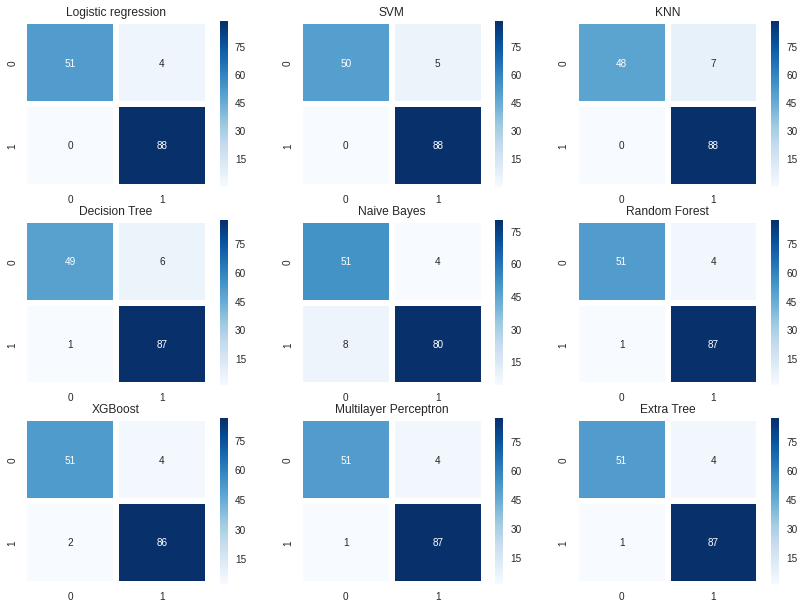

In [53]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(14, 14))

plt.subplot(4, 3, 1)
draw_confusion_matrix(clf_lr, 'Logistic regression', X_test, y_test, sclr)
plt.subplot(4, 3, 2)
draw_confusion_matrix(clf_svm, 'SVM', X_test, y_test, sclr)
plt.subplot(4, 3, 3)
draw_confusion_matrix(clf_knn, 'KNN', X_test, y_test, sclr)
plt.subplot(4, 3, 4)
draw_confusion_matrix(clf_dt, 'Decision Tree', X_test, y_test)
plt.subplot(4, 3, 5)
draw_confusion_matrix(clf_nb, 'Naive Bayes', X_test, y_test)
plt.subplot(4, 3, 6)
draw_confusion_matrix(clf_rf, 'Random Forest', X_test, y_test)
plt.subplot(4, 3, 7)
draw_confusion_matrix(clf_xgb, 'XGBoost', X_test, y_test)
plt.subplot(4, 3, 8)

##MLP
y_preds = np.multiply(clf_mlp.predict(X_test) > 0.5, 1).flatten()
cf_matrix = confusion_matrix(y_test, y_preds)
cbar_kws = {
    "ticks": np.array([15, 30, 45, 60, 75]),
}
sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=5, cbar_kws=cbar_kws)

plt.title("Multilayer Perceptron")
plt.subplot(4, 3, 9)
draw_confusion_matrix(clf_etc, 'Extra Tree', X_test, y_test, None)

### Evalution

In this chapter we go through a set of random states (used in train-test splitting and some algorithms) and see how testing accuracy of each algorithm fares.

In [85]:
'''
all_iterations
  |_seed
    |_dropped_highly_correlated_features
    |_features
    |_results
    |_models
      |_LogReg
      |_SVM
      |_kNN
      |_DT
      |_NB
      |_RF
      |_XGB
      |_MLP
      |_ETC
'''
all_iterations = {}

seed_range = range(11)

for seed in seed_range:
    print("SEED " + str(seed))
    current_seed_iteration = {}

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

    # Feature selection
    cor_matrix_without_target = X_train.phik_matrix(interval_cols=X_train.columns)

    # Drop highly correlated featyres
    upper_tri = cor_matrix_without_target.abs().where(
        np.triu(np.ones(cor_matrix_without_target.shape), k=1).astype(np.bool_))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    X_train = X_train.drop(list(to_drop), axis=1)
    X_test = X_test.drop(list(to_drop), axis=1)

    current_seed_iteration["dropped_highly_correlated_features"] = to_drop

    # Feature selection SequentialFeature
    X_best = SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500), n_features_to_select=7, cv=10,
                                       direction='forward', n_jobs=4).fit(X_train, y_train)
    mask = X_best.get_support()
    best_features = []
    for curr_bool, feature in zip(mask, X_train.columns):
        if curr_bool:
            best_features.append(feature)

    # Use best fetures obtained from SequentialFeatureSelector
    X_train = X_train[X_train.columns[X_best.get_support(indices=True)]]
    X_test = X_test[X_test.columns[X_best.get_support(indices=True)]]

    current_seed_iteration["features"] = best_features

    # Training and testing
    results = pd.DataFrame(
        columns=['Algorithms', 'Training Accuracy', 'Testing Accuracy', 'Testing Recall', 'Testing F1 Score',
                 'Testing AUC'])

    models = {}
    # Logistic Regression
    clf_lr, results = grid_search_LogisticRegression(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["LogReg"] = clf_lr
    # Support Vector Machine
    clf_svm, results = grid_search_SVM(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["SVM"] = clf_svm
    # K-Nearest Neighbour
    clf_knn, results = grid_search_kNN(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["kNN"] = clf_knn
    # Decision Tree
    clf_dt, results = grid_search_DecisionTree(X_train, y_train, X_test, y_test, results, seed, print_bool=False)
    models["DT"] = clf_dt
    # Naive Bayes
    clf_nb, results = grid_search_NaiveBayes(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["NB"] = clf_nb
    # Random Forest
    clf_rf, results = grid_search_RandomForest(X_train, y_train, X_test, y_test, results, seed, print_bool=False)
    models["RF"] = clf_rf
    # XGBoost
    clf_xgb, results = grid_search_XGBoost(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["XGB"] = clf_xgb
    # Multilayer Perceptron
    clf_mlp, results = MLP(X_train, y_train, X_test, y_test, results, print_bool=False)
    models["mlp"] = clf_mlp
    # ExtraTreesClassifier
    clf_etc, results = grid_search_ExtraTrees(X_train, y_train, X_test, y_test, results, seed, print_bool=False)
    models["ETC"] = clf_etc

    current_seed_iteration["models"] = models
    current_seed_iteration["results"] = results

    all_iterations[seed] = current_seed_iteration

SEED 0
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Training accuracy: 0.9647887323943662
Testing accuracy: 0.958041958041958
Test recall: 0.9777777777777777
Testing F1 Score: 0.967032967032967
Testing AUC: 0.9511530398322852

Best hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Training accuracy: 0.971830985915493
Testing accuracy: 0.958041958041958
Test recall: 0.9666666666666667
Testing F1 Score: 0.9666666666666667
Testing AUC: 0.9550314465408806

Best hyperparameters: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}
Training accuracy: 1.0
Testing accuracy: 0.9370629370629371
Test recall: 0.9555555555555556
Testing F1 Score: 0.9502762430939227
Testing AUC: 0.9306079664570233

Best hyperparameters: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}
Training accuracy: 0.9788732394366197
Testing accuracy: 0.9090909090909091
Test recall: 0.9444444444444444
Testing F1 Score: 0.9289617486338798
Tes

{'Logistic regression': {'worst': 0.9230769230769231, 'median': 0.9475524475524475, 'best': 0.972027972027972}, 'Support Vector Machine': {'worst': 0.9230769230769231, 'median': 0.9545454545454546, 'best': 0.9790209790209791}, 'KNN': {'worst': 0.916083916083916, 'median': 0.9300699300699301, 'best': 0.9790209790209791}, 'Decision Tree': {'worst': 0.8601398601398601, 'median': 0.8951048951048951, 'best': 0.951048951048951}, 'Naive Bayes': {'worst': 0.8951048951048951, 'median': 0.916083916083916, 'best': 0.9370629370629371}, 'Random Forest': {'worst': 0.9230769230769231, 'median': 0.9405594405594406, 'best': 0.965034965034965}, 'XGB': {'worst': 0.9230769230769231, 'median': 0.9475524475524475, 'best': 0.972027972027972}, 'Multilayer Perceptron': {'worst': 0.9020979020979021, 'median': 0.9370629370629371, 'best': 0.9790209790209791}, 'Extra Trees': {'worst': 0.9090909090909091, 'median': 0.9405594405594406, 'best': 0.9790209790209791}}


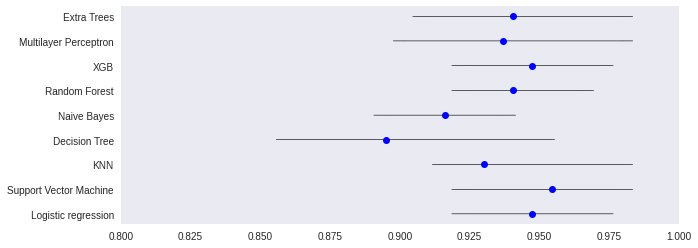

In [86]:
'''
model_summary
        |_model
          |_worst
          |_median
          |_best
'''
model_summary = {}
model_names = list(all_iterations[list(seed_range)[0]]["results"]["Algorithms"])
for model_name in model_names:
    model_scores = []
    for seed in seed_range:
        model_results = all_iterations[seed]["results"]
        model_score = float(model_results[model_results['Algorithms'] == model_name]["Testing F1 Score"])
        model_scores.append(model_score)

    model_summary[model_name] = {
        "worst": np.min(model_scores),
        "median": np.median(model_scores),
        "best": np.max(model_scores)
    }

#print(model_accs)
fig, ax = plt.subplots(figsize=(10, 4))

for i, model_name in enumerate(model_names):
    ax.arrow(model_summary[model_name]["median"], i, model_summary[model_name]["worst"] - model_summary[model_name]["median"], 0)
    ax.arrow(model_summary[model_name]["median"], i, model_summary[model_name]["best"] - model_summary[model_name]["median"], 0)
    plt.plot(model_summary[model_name]["median"], i, 'bo')

    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)
    ax.set_xlim(0.8, 1)
    ax.grid()

plt.show()

In upper plot, lines represent ranges of testing accuracy for each algorithm while dots represent median values. We can see that Extra Trees Classifier, Multilayer Perceptron, k-Nearest Neighbors and Support Vector Machine all achieve equally high accuracy for the best hyperparameters and random states, but SVM has the highest median accuracy and minimum accuracy so it should be used. kNN is right skewed so it is not recommended to use it because it can often have poor accuracy.

*TODO: Dodati zakljucak :)*

### Acknowledgements
Special thanks to...

- Creators of the article:
 
 Sharmin Ara, Department of CSE, CUET, Chittagong-4349, Bangladesh, u1604044@student.cuet.ac.bd
 
 Annesha Das, Department of CSE, CUET, Chittagong-4349, Bangladesh, annesha@cuet.ac.bd

 Ashim Dey, Department of CSE, CUET, Chittagong-4349, Bangladesh, ashim@cuet.ac.bd
 
 
- Creators of the dataset:

 Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

 W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

 Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu 


- Project mentor:

 Eugen Vušak, Department of Electronics, Microelectronics, Computer and Intelligent Systems, Faculty of Electrical Engineering and Computing, University of Zagreb, eugen.vusak@fer.hr